### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from scipy import stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score

### Importing Dataset

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### EDA

In [4]:
df = pd.get_dummies(df, prefix = ["sex", "smoker", "region"], drop_first=True)

In [5]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


#### Charges for Smokers and Non-Smokers

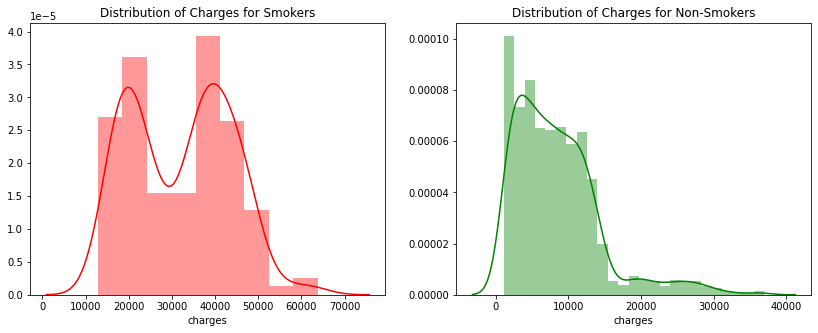

In [6]:
fig, axes = plt.subplots(1,2, figsize=(14,5))

sns.distplot(df[df['smoker_yes']==1]['charges'], ax=axes[0], color='r').set_title('Distribution of Charges for Smokers')

sns.distplot(df[df['smoker_yes']==0]['charges'], ax=axes[1], color='g')
plt.title('Distribution of Charges for Non-Smokers')
plt.show()

For  maximum number of smokers the charges lie between 15000 to 50000, thus revealing that smokers face charges higher than that of non-smokers.

For non-smokers the graph shows that the target variable is skewed to the right i.e. maximum number of non-smokers face little charges. The graph also shows that there are a many outliers in the data.

#### Charges for Males vs Females

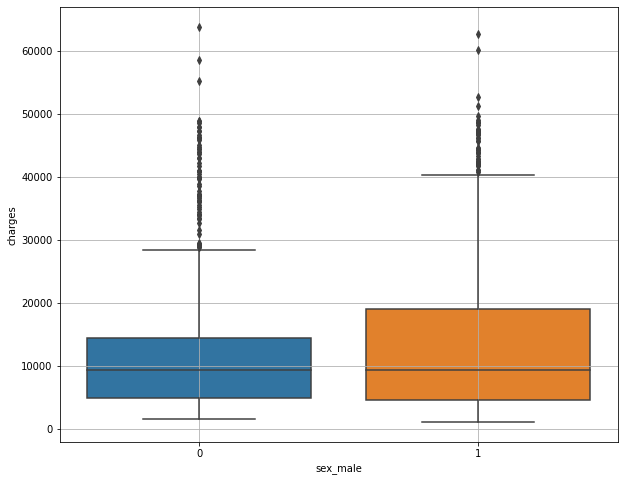

In [7]:
plt.figure(figsize=(10,8))
sns.boxplot(df['sex_male'], df['charges'])
plt.grid()
plt.show()

There is not much difference in the charges between the charges of men and women. We could also observe the presence of a lot of outliers specially in Female part.

#### BMI vs Charges

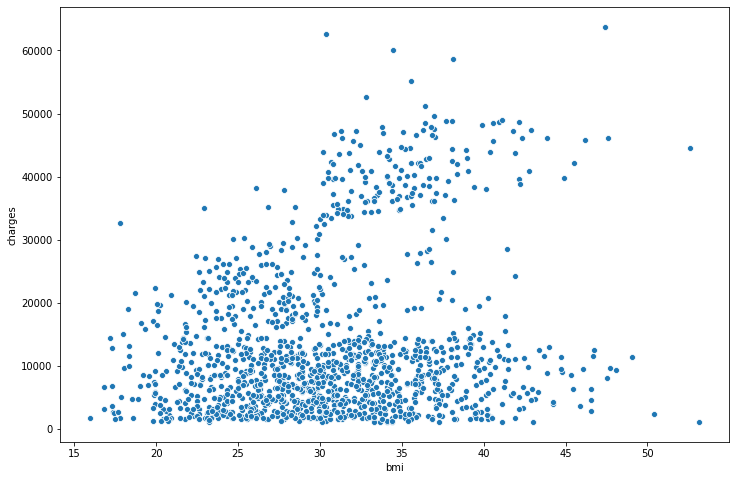

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.show()

BMI above 30 is considered obese and we can see that as the BMI increases above 30 the charges rate shoots up.

#### Variation of Charges with number of Children

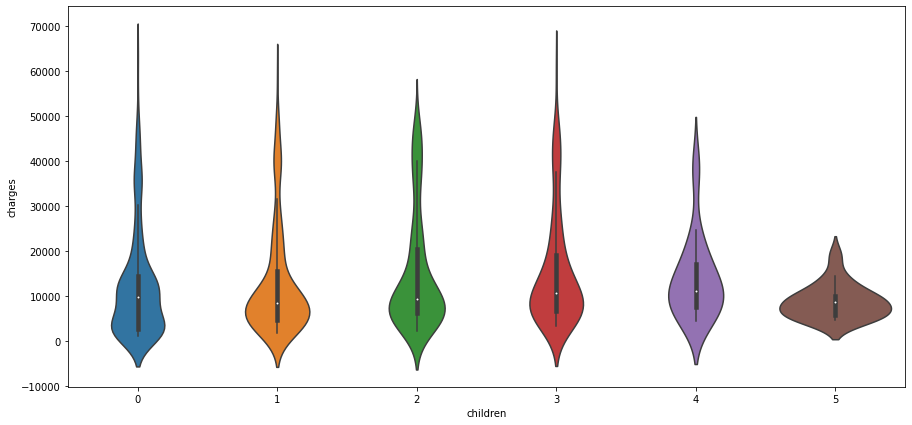

In [9]:
plt.figure(figsize=(15,7))
sns.violinplot(x='children', y='charges', data=df)
plt.show()

The violin plot clearly shows that people with 5 children have the lowest charges, but it is difficult to say anything about the highest charges. Lets plor a barchart to clarify things.

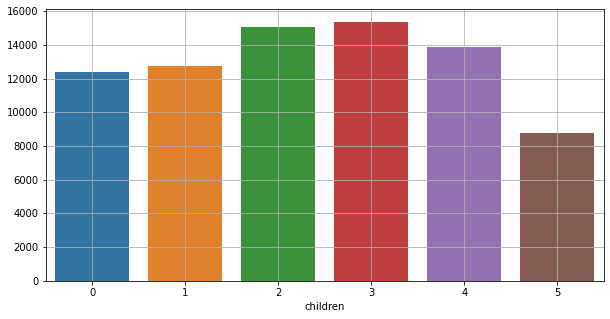

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(df.groupby('children').mean()['charges'].index, df.groupby('children').mean()['charges'].values)
plt.grid()
plt.show()

Bingo.. The barchart clearly shows that people with 3 children have the highest charges. It also validates the result of the violinplot saying that people with 5 children have the lowest charges.

#### Correlation Matrix

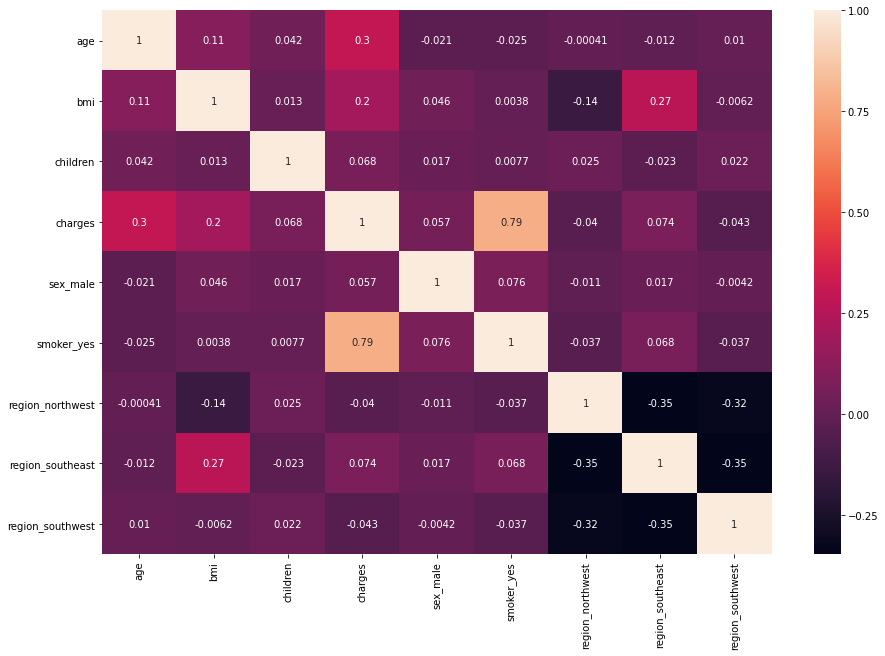

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

The highest correlation with Charges is with Smokers and the lowest correlation is with different regions.

### Pre-processing the Data

The categorical features were converted into dummy features as the first step towards pre-processing.

The next step would be towards defining the features as independent and dependent in the form of X and y respectively, and finally scale the independent features X.

In [12]:
X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

ss = StandardScaler()

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

## Regression -  Statistics Approach 

In [13]:
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc)
lr = model.fit()
lr.summary()

C:\Users\91880\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:04:48   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819    -12.086      0.000   -1.39e+04      -1e+04
age                256.8564     11.899     21.587      0.000     233.514     280.199
bmi                339.1935     28.599     11.860      0.000     283.088     395.298
children           475.5005    137.804      3.451      0.001     205.163     745.838
sex_male          -131.3144    332.945     -0.394      0.693    -784.470     521.842
smoker_yes        2.385e+04    413.153     57.723      0.000     2.3e+04    2.47e+04
region_northwest  -352.9639    476.276     -0.741      0.459   -1287.298     581.370
region_southeast -1035.0220    478.692     -2.162      0.031   -1974.097     -95.947
region_southwest  -960.0510    477.933     -2.009      0.045   -1897.636     -22.466
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusions from the Statisticale Summary

1. The pvalue for the sex region is 0.692 and hence it is irrelevant. We had also deduced the same from the visualization that the charges was not biased to any gender.
2. The charges was very much dependent on smoking and hence the pvalue for that region is 0.00.
3. The pvalue for the children is also 0 hence we can confidently say that the charges vary with the number of children a person has. Same goes with age and BMI.
4. Coming to the region column as the pvalue is large it can be again concluded that the variation in charges is not dependent on the region.
5. To our surprise all the visualization conclusion allign with the statistical summary, but it should be kept in mind that the visualization sometimes may be confusing and may not always tell us what really is going on. We always should perform statistical analysis to confirm our beliefs.

### Assumptions of Linear Regression

#### 1. Multicollinearity

In [14]:
vif = [vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif, index=Xc.columns, columns=['VIF'])

,VIF
const,35.527488
age,1.016822
bmi,1.106630
children,1.004011
sex_male,1.008900
smoker_yes,1.012074
region_northwest,1.518823
region_southeast,1.652230
region_southwest,1.529411


All the features have VIF below 5. So we can safely conclude that all the features are relevant as none of them show multimollinearity.

#### 2. Linearity of the relationship

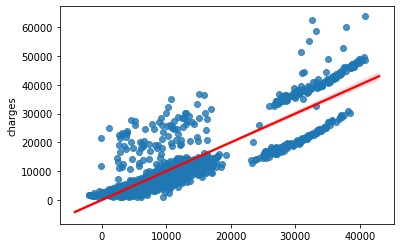

In [15]:
pred = lr.predict()
sns.regplot(x=pred, y=y, line_kws={'color':'red'})
plt.show()

In [16]:
fstat, pvalue = sm.stats.diagnostic.linear_rainbow(lr)
print("The p-value is: ",pvalue)

The p-value is:  0.05840533768725399


The pvalue is above 0.05, hence we can conclude that our Null Hypothesis is true which is the fit of the model using full sample is the same as using a central subset and hence a Linear regression model can be built.

#### 3. Normality of the residuals

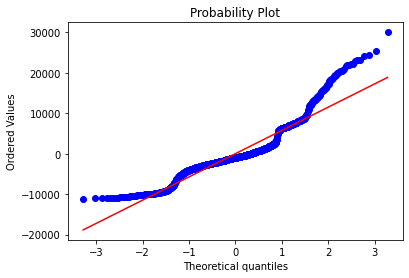

In [17]:
stats.probplot(lr.resid, plot=plt)
plt.show()

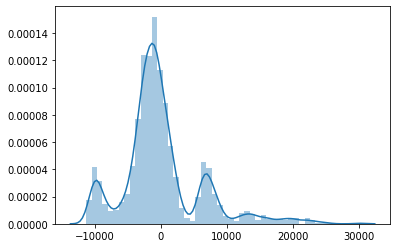

In [18]:
sns.distplot(lr.resid)
plt.show()

In [19]:
stat, pvalue = stats.jarque_bera(lr.resid)

print("The p-value is: ",pvalue)

The p-value is:  0.0


The pvalue is much below the significance level. Hence the residuals are not normally distributed and we need to normalize it before proceeding further.

#### 4. Homoscedasticity

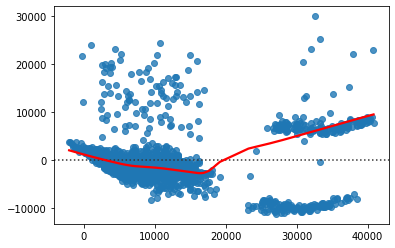

In [20]:
sns.residplot(lr.predict(), lr.resid, lowess=True, line_kws={'color':'red'})
plt.show()

In [21]:
fval, pval, res = sms.het_goldfeldquandt(lr.resid, Xc)

print("The p-value is: ",pval)

The p-value is:  0.7162991411316741


As the pvalue is above the significance level, hence we conclude that we fail to reject the null hypothesis which is the variance of errors is constant across the range of data.

#### 5. Autocollinearity

The Durbin Watson value of 2.088 in the model summary shows that there is no Autocollinearity.

#### Removing insignificant Features
Now we try to remove the insignificant features whose pvalue is greater than 0.05 in the t-test performed in the statistical summary.

In [37]:
while (len(X.columns)>0):
    Xc1 = sm.add_constant(X)
    ols = sm.OLS(y, Xc1)
    model = ols.fit()
    f = model.pvalues[1:].idxmax()
    if (model.pvalues[1:].max()>0.05):
        X = X.drop(f, axis=1)
    else:
        break

print("The final features are:",X.columns)

The final features are: Index(['age', 'bmi', 'children', 'smoker_yes'], dtype='object')


C:\Users\91880\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
Xc2 = sm.add_constant(X)
ols = sm.OLS(y, Xc2)
lr = ols.fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Fri, 17 Jul 2020   Prob (F-statistic):               0.00
Time:                        23:05:23   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
age          257.8495     11.896     21.675      0.000     234.512     281.187
bmi          321.8514     27.378     11.756      0.000     268.143     375.559
children     473.5023    137.792      3.436      0.001     203.190     743.814
smoker_yes  2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The Rsquare value is 0.75.

In [25]:
error = lr.resid
mse = np.mean(error**2)
rmse = np.sqrt(mse)
rmse

6056.439217188078

#### The Root Mean Squared Error is 6056.

### Regression - Machine Learning Approach

#### Linear Regression

In [26]:
X = df.drop(['charges'], axis = 1)
y = df.charges

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("The score is:",lr.score(X_test,y_test))
print("The RMSE for the training set is:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("The RMSE for the testing set is:",np.sqrt(mean_squared_error(y_test, y_test_pred)))

The score is: 0.7958786376014413
The RMSE for the training set is: 6164.499984064468
The RMSE for the testing set is: 5668.840025911985


#### A little bit of Preprocessing

In [27]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

rmseLinear = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("The score is:",plr.score(X_test,y_test))
print("The RMSE for the training set is:",np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("The RMSE for the testing set is:",np.sqrt(mean_squared_error(y_test, y_test_pred)))

The score is: 0.8841865060115925
The RMSE for the training set is: 4891.747938130571
The RMSE for the testing set is: 4270.016510582644


A little step of preprocessing can give us wonderful results. This shows the importance of preprocessing.

#### Feature Selection
Recursive Feature Selection

In [28]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=4)
rfe.fit(X, y)
pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Select'])

,Select
age,4
bmi,2
children,1
sex_male,5
smoker_yes,1
region_northwest,3
region_southeast,1
region_southwest,1


Hyperparameter Tuning is required as the number of features to select is not known. We will use GridSearchCV to tune the hyperparameters.

In [29]:
lr = LinearRegression()
param_grid = [{'n_features_to_select':list(range(1,len(df.columns)+1))}]

rfe = RFE(lr)
gsearch = GridSearchCV(rfe, param_grid=param_grid, cv=3, return_train_score=True)
gsearch.fit(X, y)

GridSearchCV(cv=3, estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True)

In [30]:
print(gsearch.best_params_)
pd.DataFrame(gsearch.cv_results_)

{'n_features_to_select': 8}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.013335,0.003771,0.002667,0.003772,1,{'n_features_to_select': 1},0.613007,0.636467,0.606371,0.618615,0.012911,6,0.622920,0.610644,0.626179,0.619914,0.006689
1,0.013336,0.003770,0.005337,0.003774,2,{'n_features_to_select': 2},0.612455,0.626078,0.600171,0.612901,0.010581,9,0.623421,0.612482,0.627555,0.621152,0.006359
2,0.014694,0.001853,0.000000,0.000000,3,{'n_features_to_select': 3},0.612135,0.626682,0.604645,0.614488,0.009149,8,0.623925,0.612990,0.631034,0.622650,0.007421
3,0.007999,0.000003,0.000000,0.000000,4,{'n_features_to_select': 4},0.615116,0.630037,0.605025,0.616726,0.010274,7,0.628286,0.617143,0.631268,0.625565,0.006079
4,0.008002,0.000002,0.002668,0.003773,5,{'n_features_to_select': 5},0.614995,0.670899,0.604787,0.630227,0.029060,5,0.628458,0.654914,0.631271,0.638214,0.011864
5,0.008003,0.000001,0.002667,0.003771,6,{'n_features_to_select': 6},0.614266,0.754207,0.642963,0.670479,0.060353,4,0.628684,0.744790,0.671938,0.681804,0.047911
6,0.005335,0.003772,0.002667,0.003772,7,{'n_features_to_select': 7},0.653922,0.755248,0.643199,0.684123,0.050483,3,0.667631,0.744851,0.672026,0.694836,0.035412
7,0.002667,0.003772,0.005334,0.003772,8,{'n_features_to_select': 8},0.749271,0.755182,0.728288,0.744247,0.011540,1,0.750222,0.744852,0.761373,0.752149,0.006881
8,0.005335,0.003772,0.002668,0.003773,9,{'n_features_to_select': 9},0.749271,0.755182,0.728288,0.744247,0.011540,1,0.750222,0.744852,0.761373,0.752149,0.006881


Putting the n_features_to_select value as best_params and building the model.

In [31]:
lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=8)
rfe.fit(X, y)
pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Rank'])

,Rank
age,1
bmi,1
children,1
sex_male,1
smoker_yes,1
region_northwest,1
region_southeast,1
region_southwest,1


Finally after finding the best features, we move towards regularization methods.

### Regularization

#### Lasso:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_quad, y, random_state = 0)

lassoModel = Lasso(max_iter=5000)
lasso = lassoModel.fit(X_train, y_train)
lassoPred = lasso.predict(X_test)
mseLasso = mean_squared_error(y_test, lassoPred)
rmseLasso = mseLasso**(1/2)

print("The RMSE for the model is:",rmseLasso)
print("The Rsquare for the model is:",lasso.score(X_test, y_test))

The RMSE for the model is: 4267.58016697961
The Rsquare for the model is: 0.8843186277343454


The rmse is 4267 for Lasso Regression.

#### Ridge:

In [33]:
ridgeModel = Ridge(max_iter=5000)
ridge = ridgeModel.fit(X_train, y_train)
ridgePred = ridge.predict(X_test)
mseRidge = mean_squared_error(y_test, ridgePred)
rmseRidge = mseRidge**(1/2)

print("The RMSE for the model is:",rmseRidge)
print("The Rsquare for the model is:",ridge.score(X_test, y_test))

The RMSE for the model is: 4278.079120029211
The Rsquare for the model is: 0.8837487369648958


The RMSE is 4278 for Ridge Regression.

#### ElasticNet

In [34]:
elasticNetModel = ElasticNet(alpha = 0.01, l1_ratio = 0.9, max_iter = 5000)
ElasticNet = elasticNetModel.fit(X_train, y_train)
ElasticNetPred = ElasticNet.predict(X_test)
mseElasticNet = mean_squared_error(y_test, ElasticNetPred)
rmseElasticNet = mseElasticNet**(1/2)

print("The RMSE for the model is:",rmseElasticNet)
print("The Rsquare for the model is:",ElasticNet.score(X_test, y_test))

The RMSE for the model is: 4278.092109486157
The Rsquare for the model is: 0.8837480310204632


The RMSE is 4278 for Ridge Regression.

#### It is to be seen that there is almost negligible difference between the results of Lasso, Ridge and ElasticNet Regressions.

In [35]:
performanceData = pd.DataFrame({"Regrssion":["Linear", "Lasso", "Ridge", "Elasticnet"], 
                                "RMSE":[rmseLinear, rmseLasso, rmseRidge, rmseElasticNet]})
performanceData

,Regrssion,RMSE
0,Linear,4270.016511
1,Lasso,4267.580167
2,Ridge,4278.079120
3,Elasticnet,4278.092109
